# Reinforcement learning 

Reinforcement Learning (RL) is a type of machine learning where an agent learns to make decisions by interacting with an environment. The agent receives feedback in the form of rewards or penalties based on its actions, guiding it to discover the best strategy over time. RL enables the agent to learn from trial and error, optimize its behavior, and adapt to complex, dynamic environments to achieve specific goals.

- Observations/States are the information our agent gets from the environment.
- State s: is a complete description of the state of the world (there is no hidden information).
- Observation o: is a partial description of the state. In a partially observed environment.
- The Action space is the set of all possible actions in an environment.
- The reward is fundamental in RL because it’s the only feedback for the agent. Thanks to it, our agent knows if the action taken was good or not.


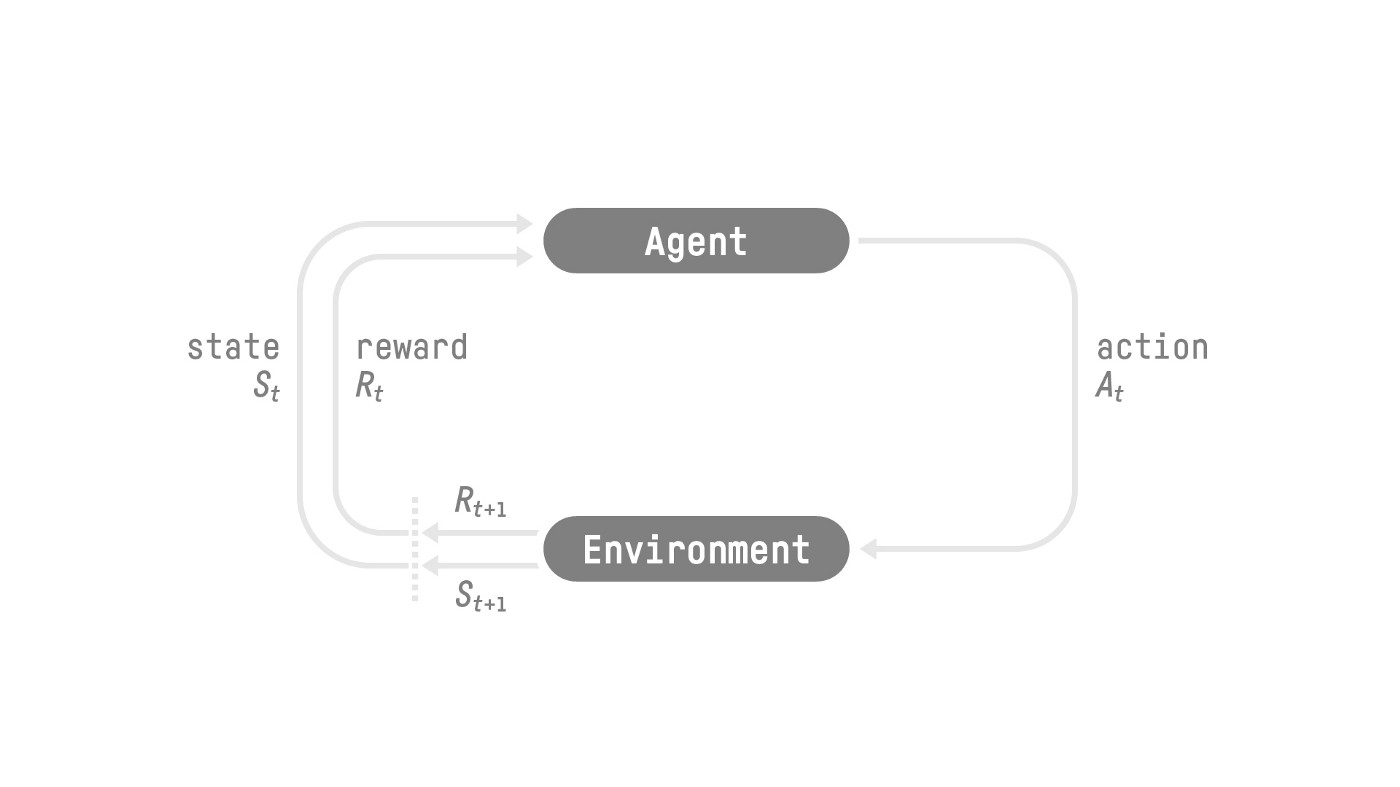

- Our Agent receives state S0 from the Environment — we receive the first frame of our game (Environment).
- Based on that state S0, the Agent takes action A0 — our Agent will move to the right.
- The environment goes to a new state S1 — new frame.
- The environment gives some reward R1 to the Agent — we’re not dead (Positive Reward +1).
This RL loop outputs a sequence of state, action, reward and next state.

- The agent’s goal is to maximize its cumulative reward, called the expected return.



# Limitations of RL

Reinforcement learning (RL) has several limitations, and understanding these limitations is crucial for its effective application. Some of the key limitations of RL include:

1. **Sample Efficiency**: RL often requires a large number of interactions with the environment to learn an effective policy. This makes RL less sample-efficient compared to other learning methods, especially in complex environments.

2. **High Dimensionality**: RL struggles with high-dimensional state and action spaces, which can lead to the "curse of dimensionality." Learning becomes challenging as the number of possible states and actions grows exponentially.

3. **Exploration-Exploitation Trade-off**: Finding a balance between exploration (trying new actions) and exploitation (using the current best action) is a challenging aspect of RL. Incorrect exploration strategies can hinder learning and lead to suboptimal policies.

4. **Reward Engineering**: Designing an appropriate reward function is crucial in RL, and poorly designed rewards can lead to undesirable agent behavior. Crafting reward functions that guide the agent to the desired behavior can be complex and require domain expertise.

5. **Instability in Learning**: RL training can be unstable and sensitive to hyperparameters, architecture choices, and initializations. Sometimes, even small changes in hyperparameters or environment dynamics can significantly impact the learning process.

6. **Delayed Rewards and Credit Assignment**: In many real-world tasks, rewards are delayed and sparse, making it challenging for the agent to attribute credit to the actions that lead to positive outcomes.

7. **Modeling Complex Environments**: In model-based RL, learning an accurate model of the environment can be challenging, especially in complex and uncertain environments.

Reinforcement learning differs from supervised machine learning (ML) and deep learning (DL) in several ways:

1. **Training Paradigm**: In supervised ML, the model is trained on a labeled dataset where inputs and their corresponding outputs are known. In RL, the agent learns from its interactions with the environment through trial and error, without explicit supervision.

2. **Objective**: In supervised ML, the goal is to minimize prediction error, typically measured by a loss function. In RL, the goal is to find a policy that maximizes the cumulative reward obtained from the environment.

3. **Feedback**: In supervised ML, the model receives direct feedback in the form of labels. In RL, the feedback (reward) is often delayed and sparse, making the learning process more challenging.

4. **State and Action Spaces**: RL deals with sequential decision-making problems where the agent observes states and selects actions based on them. This is different from traditional ML tasks where input data is treated independently.

5. **Exploration vs. Exploitation**: RL faces the exploration-exploitation trade-off, which is not typically present in supervised ML tasks.

6. **Modeling Environment**: In RL, agents can learn from the environment directly (model-free RL) or learn a model of the environment (model-based RL). Supervised ML and DL typically do not involve environment modeling.

Despite its limitations, RL has shown promising results in various domains, such as game playing, robotics, and finance, and continues to be an active area of research and application.



# Install Dependencies

In [2]:
# Gym stuff
import gym
import gym_anytrading
from gym_anytrading.envs import StocksEnv

# Stable baselines - rl stuff
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.callbacks import EvalCallback, StopTrainingOnRewardThreshold
from stable_baselines3 import A2C, DQN, PPO

#Quant Finance
from finta import TA
import quantstats as qs

# Processing libraries
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Source Trading Data

In [21]:
data = pd.read_csv('MSFT.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-07-23,106.300003,108.139999,106.129997,107.970001,102.117790,29707000
1,2018-07-24,108.570000,108.820000,107.260002,107.660004,101.824585,26316600
2,2018-07-25,107.959999,111.150002,107.599998,110.830002,104.822769,30702100
3,2018-07-26,110.739998,111.000000,109.500000,109.620003,103.678368,31372100
4,2018-07-27,110.180000,110.180000,106.139999,107.680000,101.843513,37005300


In [24]:
# Preprocess the  date column and set to index
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
len(data)

1258

# Exploratory Data Analysis

In [25]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-07-23,106.300003,108.139999,106.129997,107.970001,102.117790,29707000
2018-07-24,108.570000,108.820000,107.260002,107.660004,101.824585,26316600
2018-07-25,107.959999,111.150002,107.599998,110.830002,104.822769,30702100
2018-07-26,110.739998,111.000000,109.500000,109.620003,103.678368,31372100
2018-07-27,110.180000,110.180000,106.139999,107.680000,101.843513,37005300
...,...,...,...,...,...,...
2023-07-17,345.679993,346.989990,342.200012,345.730011,345.730011,20363900
2023-07-18,345.829987,366.779999,342.170013,359.489990,359.489990,64872700
2023-07-19,361.750000,362.459991,352.440002,355.079987,355.079987,39732900


In [26]:
data.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [5]:
# Create a complete date range with daily frequency covering the entire index range
complete_date_range = pd.date_range(start=data.index.min(), end=data.index.max(), freq='D')

# Find the missing dates
missing_dates = set(complete_date_range) - set(data.index)

print("Missing dates:")
print(missing_dates)

# Reindex the DataFrame with the complete date range, adding missing dates
data = data.reindex(complete_date_range)

# Interpolate to fill missing values
data = data.interpolate()

len(data)

Missing dates:
{Timestamp('2019-10-06 00:00:00'), Timestamp('2020-03-01 00:00:00'), Timestamp('2023-06-03 00:00:00'), Timestamp('2021-10-03 00:00:00'), Timestamp('2023-03-25 00:00:00'), Timestamp('2022-03-06 00:00:00'), Timestamp('2023-01-22 00:00:00'), Timestamp('2019-06-22 00:00:00'), Timestamp('2020-10-24 00:00:00'), Timestamp('2020-12-20 00:00:00'), Timestamp('2019-07-07 00:00:00'), Timestamp('2018-10-20 00:00:00'), Timestamp('2020-02-22 00:00:00'), Timestamp('2019-04-28 00:00:00'), Timestamp('2021-11-25 00:00:00'), Timestamp('2023-06-24 00:00:00'), Timestamp('2021-05-09 00:00:00'), Timestamp('2018-10-27 00:00:00'), Timestamp('2021-03-13 00:00:00'), Timestamp('2021-09-04 00:00:00'), Timestamp('2019-02-02 00:00:00'), Timestamp('2019-09-28 00:00:00'), Timestamp('2019-12-01 00:00:00'), Timestamp('2020-06-27 00:00:00'), Timestamp('2023-02-26 00:00:00'), Timestamp('2020-12-25 00:00:00'), Timestamp('2021-12-05 00:00:00'), Timestamp('2022-09-11 00:00:00'), Timestamp('2020-02-08 00:00:00')

1825

# Build Environment

In [29]:
# Define environment by levaraging gym library
# OpenAI Gym library provides a collection of environments that allow you to train and evaluate reinforcement learning algorithms.
# Instantiate and return an environment object for the "stocks-v0" environment

env = gym.make('stocks-v0', df=data, frame_bound=(20,900), window_size=20)

d:\test\aigot\RL_env\Lib\site-packages\gym\utils\passive_env_checker.py:31: UserWarning: WARN: A Box observation space has an unconventional shape (neither an image, nor a 1D vector). We recommend flattening the observation to have only a 1D vector or use a custom policy to properly process the data. Actual observation shape: (20, 2)
  logger.warn(


In [ ]:
# Checking the values, features, action spaces
env.signal_features
env.prices
print(env.action_space)
# This env has two discrete action spaces 1) buy and 2) sell

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


info {'total_reward': 173.29010800000017, 'total_profit': 0.07838690084725114, 'position': 1}


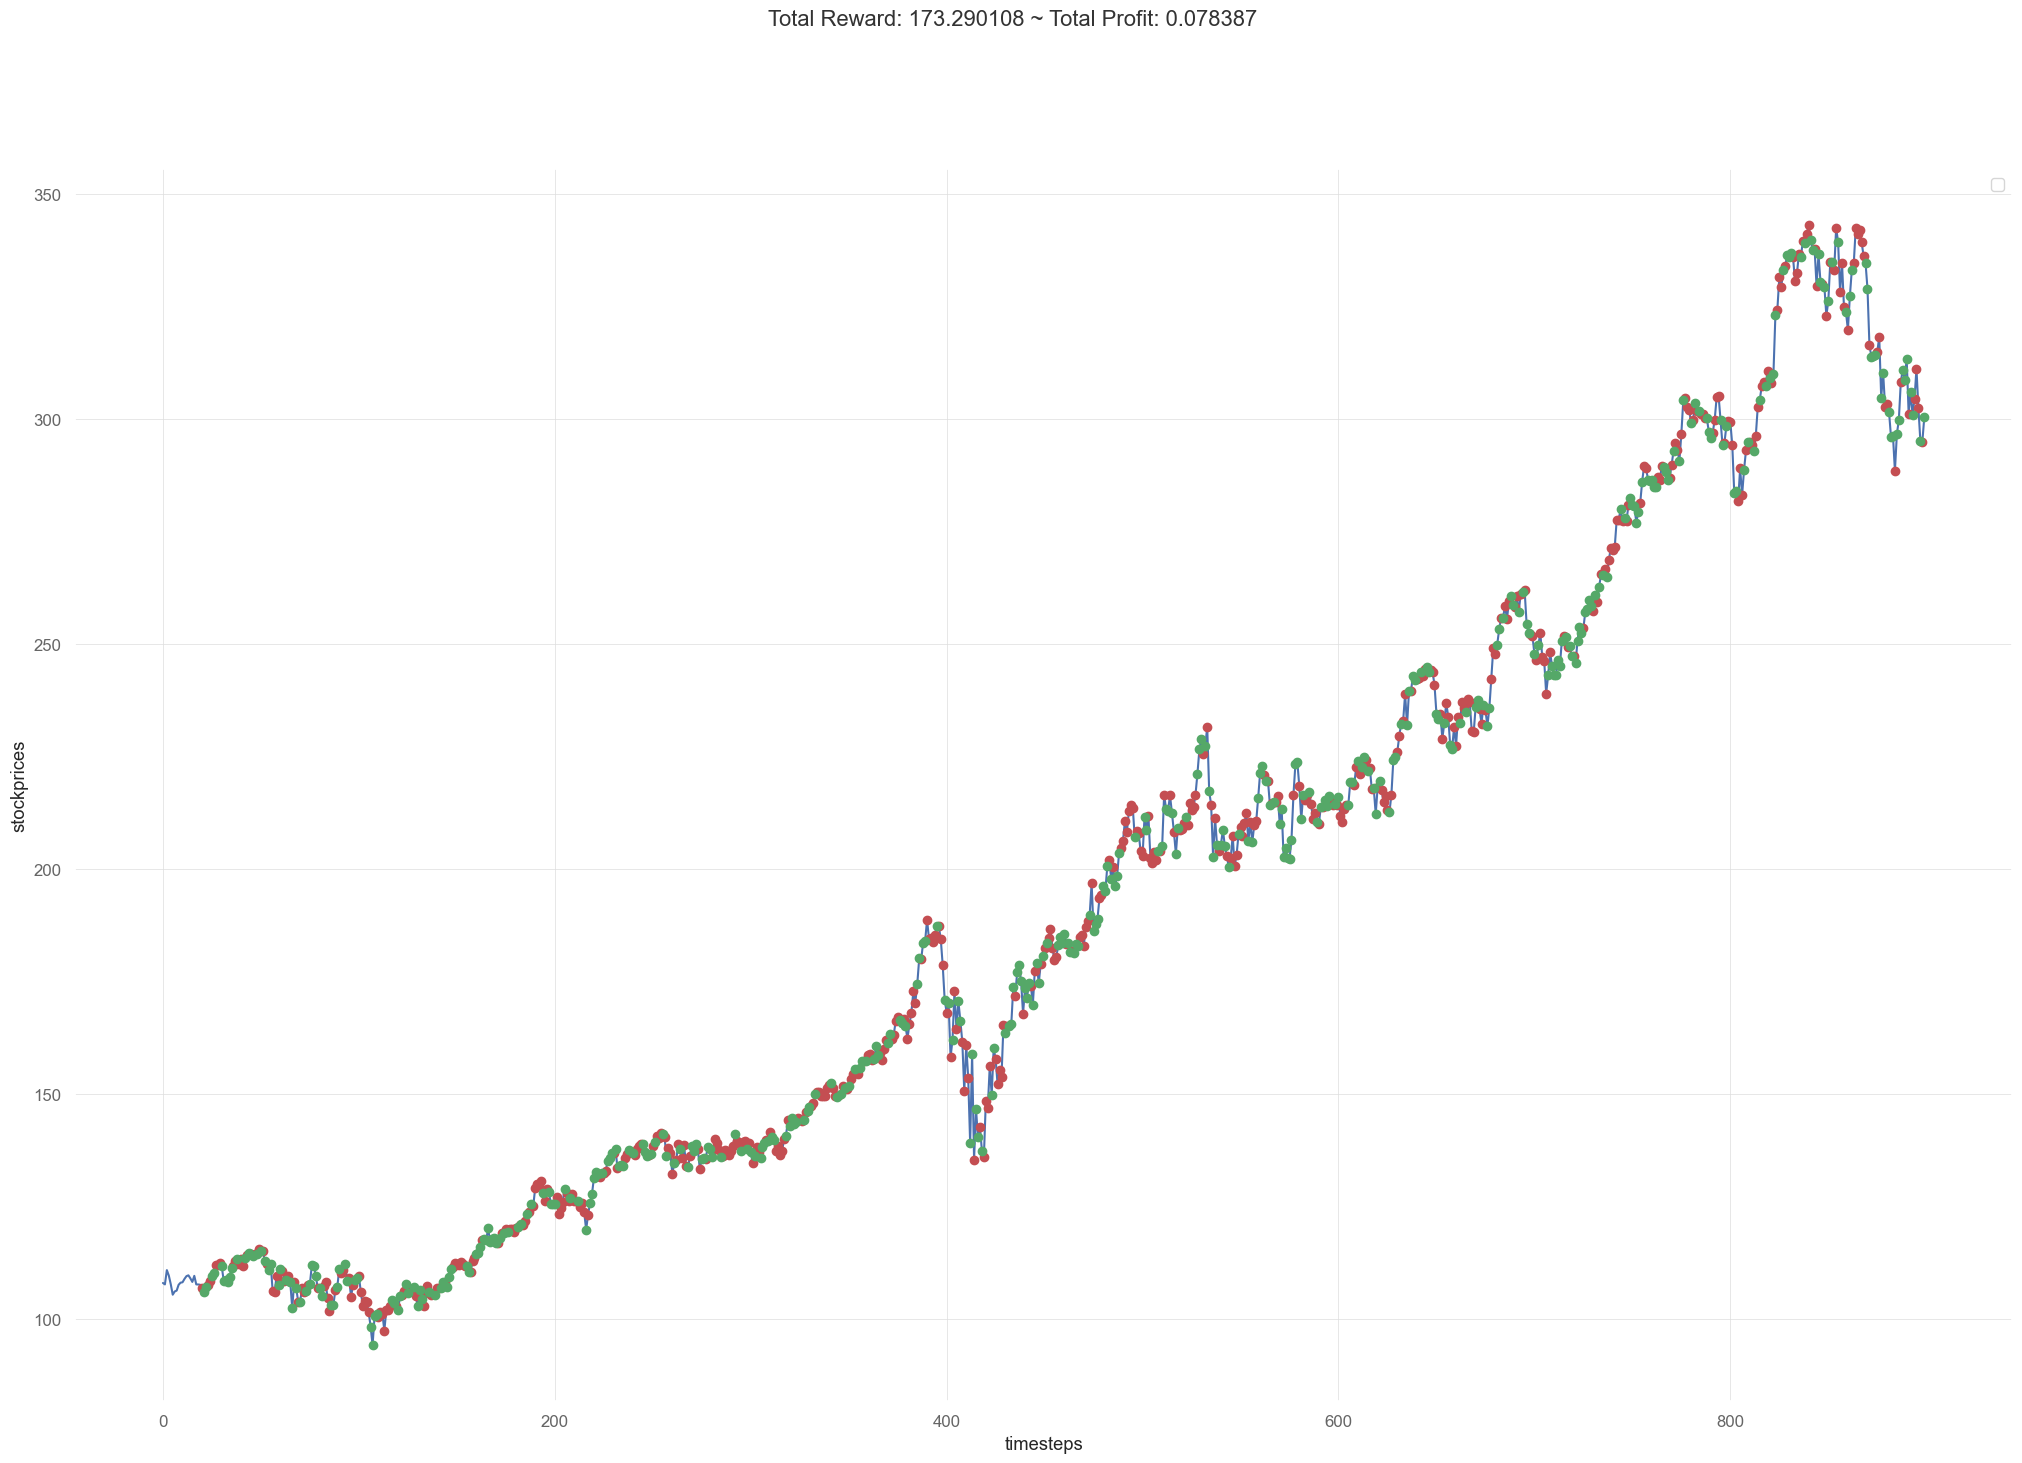

In [33]:
# Training the agent with random observations and checking the actions
state = env.reset()
while True: 
    action = env.action_space.sample()
    n_state, reward, done, info = env.step(action)
    if done: 
        print("info", info)
        break
        
plt.figure(figsize=(25,16))
plt.cla()
env.render_all()
plt.xlabel('timesteps')
plt.ylabel('stockprices')
plt.legend()
plt.show()

# Red dots - shorts - sell
# green dots - long - buy

# Build Environment and Train

There are several algorithms used in reinforcement learning (RL) training, each designed to tackle different types of problems and address specific challenges. Below are some commonly used RL algorithms and a brief overview of their functionalities:

1. **Q-Learning**:
   - Q-learning is a model-free, off-policy RL algorithm used for environments with discrete state and action spaces.
   - It learns the action-value function (Q-function) that estimates the expected reward for taking a specific action in a given state.
   - Q-learning uses the Bellman equation to update the Q-values and iteratively improves the policy.

2. **SARSA (State-Action-Reward-State-Action)**:
   - SARSA is another model-free, on-policy RL algorithm designed for environments with discrete state and action spaces.
   - It learns the Q-values using the same action-selection policy for updating the Q-values and interacting with the environment.
   - SARSA is an on-policy method and is often more cautious than Q-learning.

3. **Deep Q-Network (DQN)**:
   - DQN is a deep reinforcement learning algorithm that extends Q-learning to environments with high-dimensional state spaces, typically using deep neural networks.
   - It uses an experience replay buffer to store and randomly sample experiences, reducing correlations between consecutive experiences.
   - DQN addresses the instability in learning encountered in traditional Q-learning.

4. **Proximal Policy Optimization (PPO)**:
   - PPO is an on-policy RL algorithm designed for environments with continuous action spaces.
   - It optimizes the policy by iteratively taking small policy updates while ensuring that the new policy does not deviate significantly from the old one.
   - PPO is known for its stability and is widely used in practice.

5. **A3C (Asynchronous Advantage Actor-Critic)**:
   - A3C is an asynchronous RL algorithm that trains multiple agents in parallel and uses their experiences to update a global network.
   - It combines the advantages of actor-critic methods with parallelism to accelerate learning and improve sample efficiency.

6. **Deep Deterministic Policy Gradient (DDPG)**:
   - DDPG is a model-free, off-policy RL algorithm designed for environments with continuous action spaces.
   - It uses actor-critic architecture with two neural networks: an actor that represents the policy and a critic that estimates the Q-values.
   - DDPG introduces target networks to stabilize learning and incorporates noise for exploration.

7. **Soft Actor-Critic (SAC)**:
   - SAC is an off-policy, model-free RL algorithm for continuous action spaces.
   - It leverages entropy regularization to encourage exploration and balance the trade-off between exploration and exploitation.
   - SAC is known for its stability and ability to handle high-dimensional action spaces.

8. **TRPO (Trust Region Policy Optimization)**:
   - TRPO is an on-policy RL algorithm that optimizes the policy while ensuring a limited policy update to maintain stability.
   - It uses trust regions to bound the size of policy updates, making it more robust to large changes in policy.

9. **A2C (Advantage Actor-Critic)**:
   - A2C is an on-policy variant of A3C that combines the advantages of actor-critic methods while being more computationally efficient.
   - It uses the advantage function to estimate the advantage of taking an action compared to the average value of actions in a given state.


In [34]:
# Build env and train the agent by passing the data
env_maker = lambda: gym.make('stocks-v0', df=data, frame_bound=(20,1000), window_size=20)
env = DummyVecEnv([env_maker])

d:\test\aigot\RL_env\Lib\site-packages\gym\utils\passive_env_checker.py:31: UserWarning: WARN: A Box observation space has an unconventional shape (neither an image, nor a 1D vector). We recommend flattening the observation to have only a 1D vector or use a custom policy to properly process the data. Actual observation shape: (20, 2)
  logger.warn(
d:\test\aigot\RL_env\Lib\site-packages\stable_baselines3\common\vec_env\patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


we have to build an RL agent that can select the actions that maximize its expected cumulative reward

- The Policy π is the brain of our Agent, it’s the function that tells us what action to take given the state we are in. So it defines the agent’s behavior at a given time.

- In value-based methods, instead of learning a policy function, we learn a value function that maps a state to the expected value of being at that state.

In [ ]:
# Training the agent on two models 1) A2C model and 2) DQN model

model_a2c = A2C('MlpPolicy', env, verbose=1) 
model_a2c.learn(total_timesteps=100000)

# Replace the 'MlpPolicy' with the policy suitable for your environment (e.g., 'MlpPolicy', 'CnnPolicy', etc.)
model_dqn = DQN(policy="MlpPolicy", env=env, verbose=1)
model_dqn.learn(total_timesteps=100000)

info {'total_reward': 101.07994199999999, 'total_profit': 0.5248414486201393, 'position': 0}


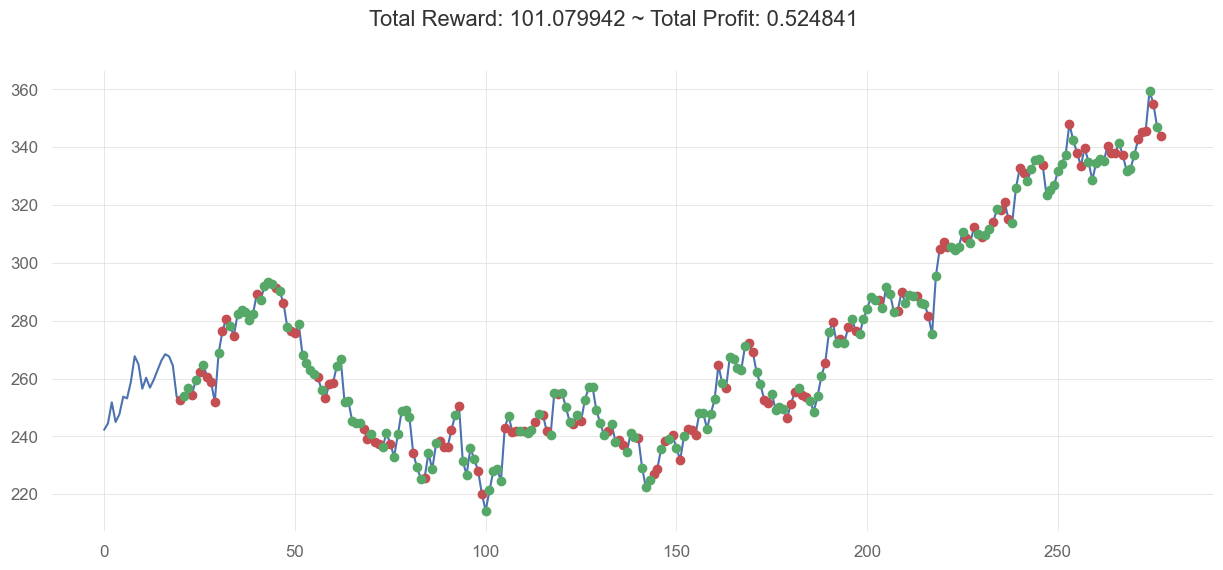

In [36]:
# A2C model testing
env = gym.make('stocks-v0', df=data, frame_bound=(1000,1258), window_size=20)
obs = env.reset()
while True: 
    obs = obs[np.newaxis, ...]
    action, _states = model_a2c.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        print("info", info)
        break


plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.xlabel('timesteps')
plt.ylabel('stockprices')
plt.show()

info {'total_reward': 97.36993000000007, 'total_profit': 0.6408122257654902, 'position': 1}


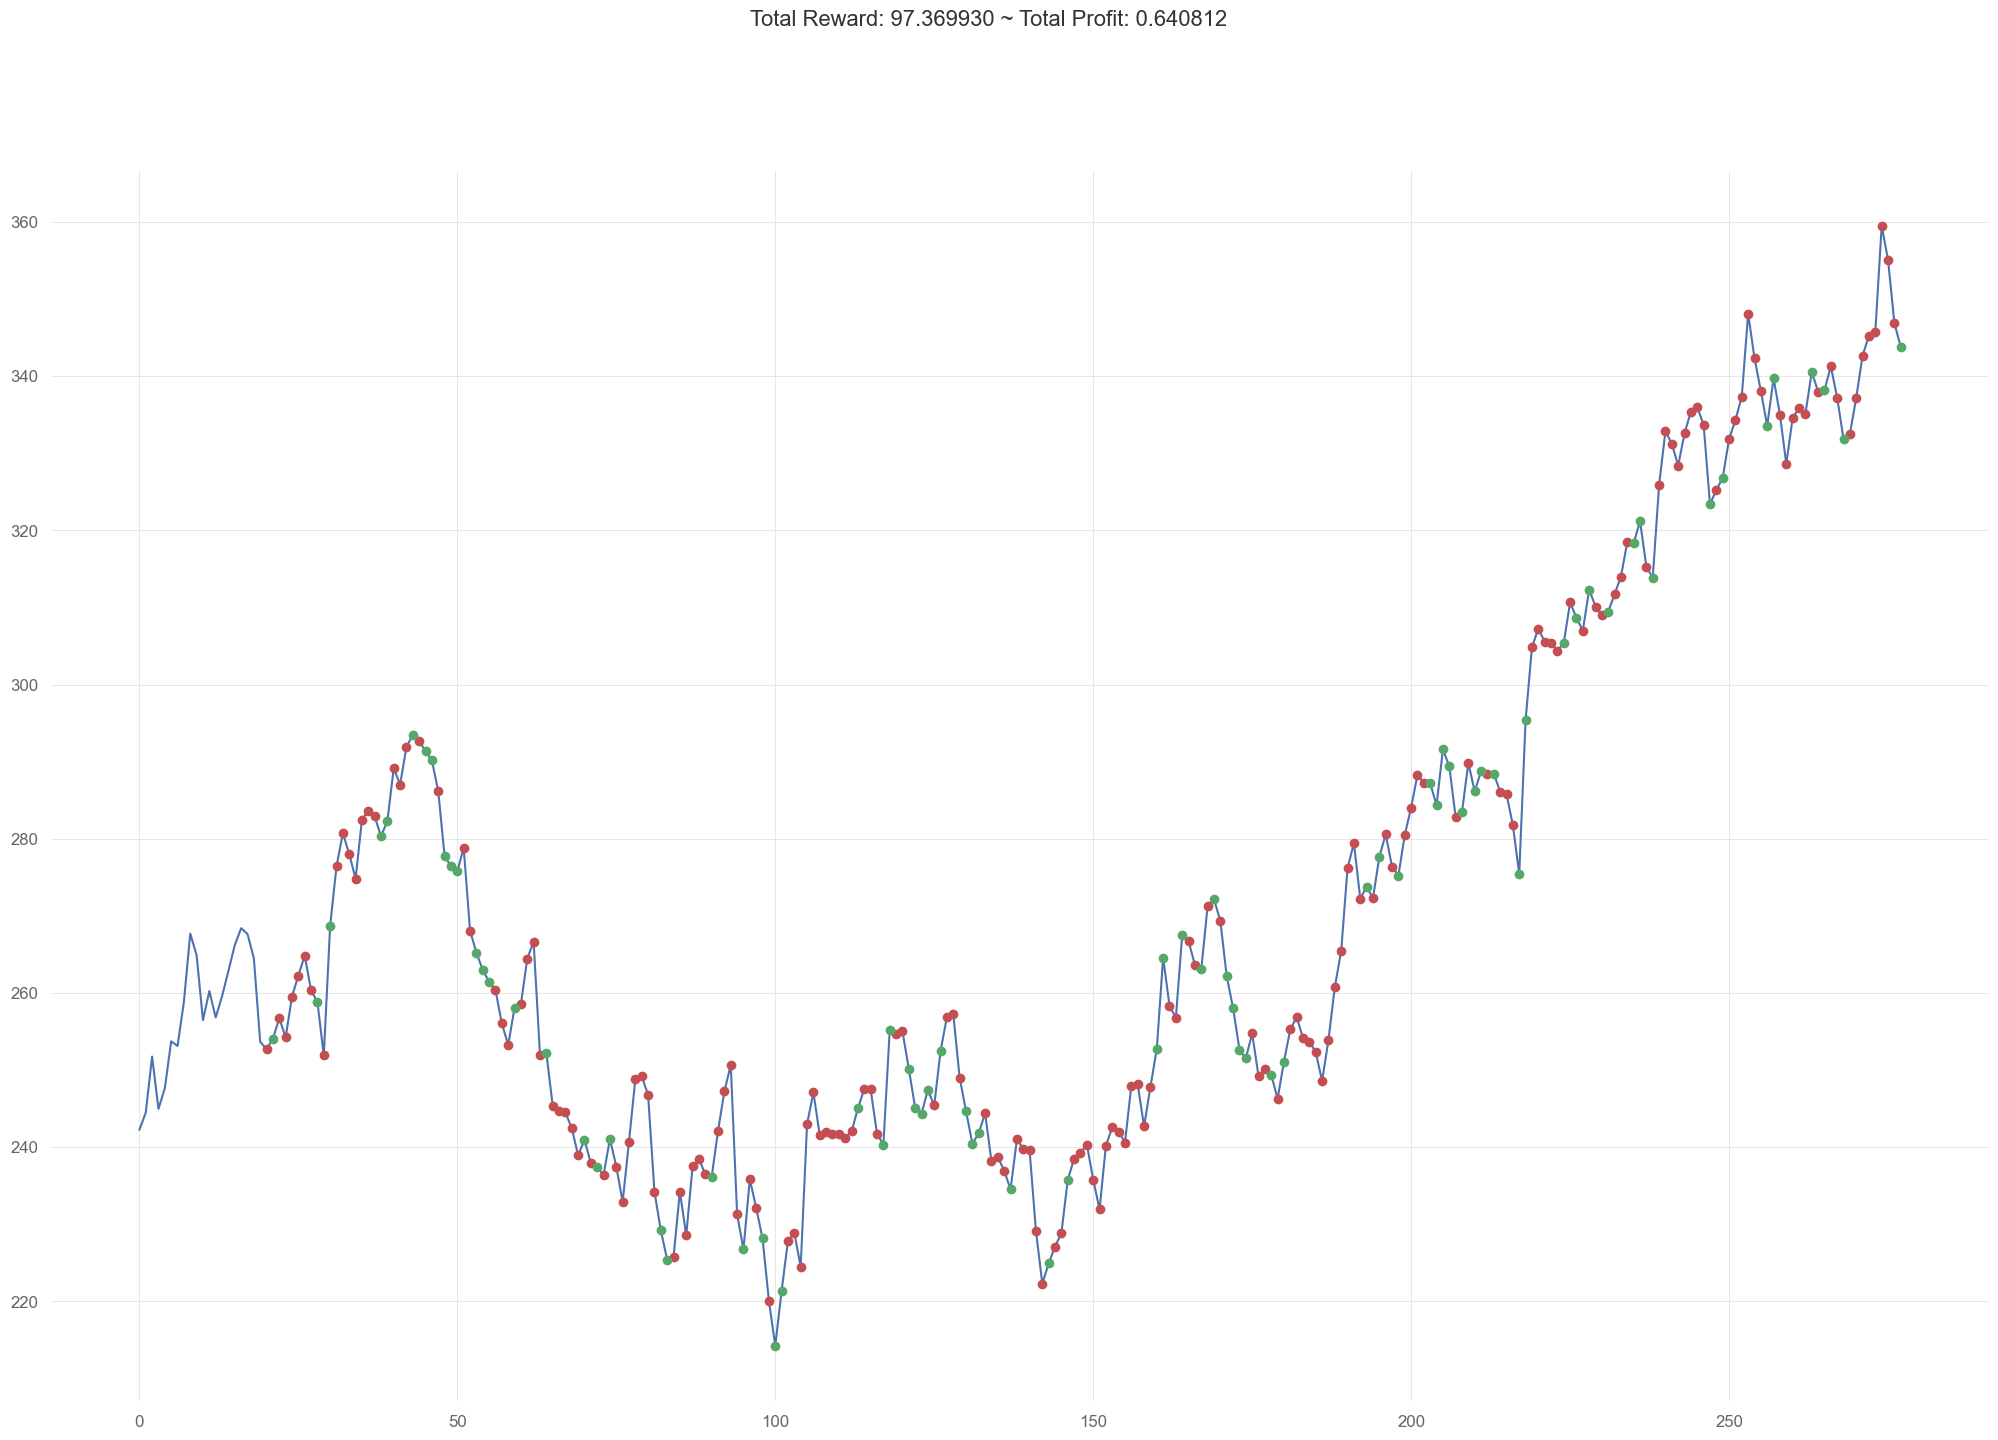

In [37]:
# DQN model testing

env = gym.make('stocks-v0', df=data, frame_bound=(1000,1258), window_size=20)
obs = env.reset()
while True: 
    #obs = obs[np.newaxis, ...]
    action, _states = model_dqn.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        print("info", info)
        break


plt.figure(figsize=(25,16))
plt.cla()
env.render_all()
plt.xlabel('timesteps')
plt.ylabel('stockprices')
plt.show()

# Add Custom Indicators

### SMA RSI OBV

In trading, RSI (Relative Strength Index), SMA(Simple Moving Average), and OBV(On-Balance Volume) are technical indicators used to analyze price movements and trading volume of a financial instrument (such as a stock, currency pair, or commodity). These indicators help traders identify potential trends, reversals, and overbought or oversold conditions in the market. 

In [38]:
#Create columns for technical indicators & add them to the dataframe
data['RSI'] = TA.RSI(data,16)
data['SMA'] = TA.SMA(data)
data['OBV'] = TA.OBV(data)
data.fillna(0, inplace=True)

# Build Gym

In [39]:
#Create a function to properly format data frame to be passed through environment
def signals(env):
    start = env.frame_bound[0] - env.window_size
    end = env.frame_bound[1]
    prices = env.df.loc[:,'Close'].to_numpy()[start:end]
    signal_features = env.df.loc[:, ['Close','Open','High','Volume','RSI','SMA','OBV',]].to_numpy()[start:end]
    return prices, signal_features

In [40]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,RSI,SMA,OBV
Date,,,,,,,,,
2018-07-23,106.300003,108.139999,106.129997,107.970001,102.117790,29707000,0.000000,0.0,0.0
2018-07-24,108.570000,108.820000,107.260002,107.660004,101.824585,26316600,0.000000,0.0,-26316600.0
2018-07-25,107.959999,111.150002,107.599998,110.830002,104.822769,30702100,91.602020,0.0,4385500.0
2018-07-26,110.739998,111.000000,109.500000,109.620003,103.678368,31372100,66.718740,0.0,-26986600.0
2018-07-27,110.180000,110.180000,106.139999,107.680000,101.843513,37005300,45.555255,0.0,-63991900.0


In [51]:
len(data)

1258

In [57]:
#Replace default data process with custom function from above
class MyCustomEnv(StocksEnv):
    _process_data = signals
    
#Initialize an environment setting the window size and train data
env2 = MyCustomEnv(df=data, window_size=20, frame_bound=(20, 1000))

In [58]:
#Create a Dummy Vector of our environment
env_maker = lambda: env2
env = DummyVecEnv([env_maker])

d:\test\aigot\RL_env\Lib\site-packages\stable_baselines3\common\vec_env\patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


# Train Agent

In [59]:
# Create log dir to save path to store our callback and model
log_dir = "best_model/tmp/"
save_path = os.path.join('best_model','tmp')


#Stop training when the model reaches a stable training threshold
stop_callback = StopTrainingOnRewardThreshold(reward_threshold=200, verbose=1)

#Check training & evaluate performance unitl threshold has been met
eval_callback = EvalCallback(env,
                            callback_on_new_best=stop_callback,
                            eval_freq=10000,
                            best_model_save_path=save_path,
                            verbose=1)

In [ ]:
#initialize our A2C model and train
model_a2c = A2C('MlpPolicy', env, verbose=1) 
model_a2c.learn(total_timesteps=1000000, callback=eval_callback)
#model_a2c.learn(total_timesteps=100000)

In [ ]:
#initialize our PPO model and train
model_PPO = PPO('MlpPolicy', env, verbose=1)
model_PPO.learn(total_timesteps=1000000, callback=eval_callback)
#model_PPO.learn(total_timesteps=100000)

In [45]:
# #initialize our DQN model and train
model_DQN = DQN('MlpPolicy', env, verbose=1)
model_DQN.learn(total_timesteps=1000000, callback=eval_callback)
#model_DQN.learn(total_timesteps=100000)

Using cpu device


d:\test\aigot\RL_env\Lib\site-packages\stable_baselines3\common\buffers.py:229: UserWarning: This system does not have apparently enough memory to store the complete replay buffer 2.26GB > 1.41GB
  warnings.warn(


----------------------------------
| rollout/            |          |
|    exploration_rate | 0.963    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 5216     |
|    time_elapsed     | 0        |
|    total_timesteps  | 3916     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.926    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 5291     |
|    time_elapsed     | 1        |
|    total_timesteps  | 7832     |
----------------------------------


d:\test\aigot\RL_env\Lib\site-packages\stable_baselines3\common\evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=10000, episode_reward=-1.84 +/- 0.00
Episode length: 979.00 +/- 0.00
----------------------------------
| eval/               |          |
|    mean_ep_length   | 979      |
|    mean_reward      | -1.84    |
| rollout/            |          |
|    exploration_rate | 0.905    |
| time/               |          |
|    total_timesteps  | 10000    |
----------------------------------
New best mean reward!
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.886    |
| time/               |          |
|    episodes         | 12       |
|    fps              | 1946     |
|    time_elapsed     | 6        |
|    total_timesteps  | 11958    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.849    |
| time/               |          |
|    episodes         | 16       |
|    fps              | 2286     |
|    time_elapsed     | 6        |
|    total_time

# Test

info {'total_reward': 102.51998699999999, 'total_profit': 0.7015278475685859, 'position': 1}


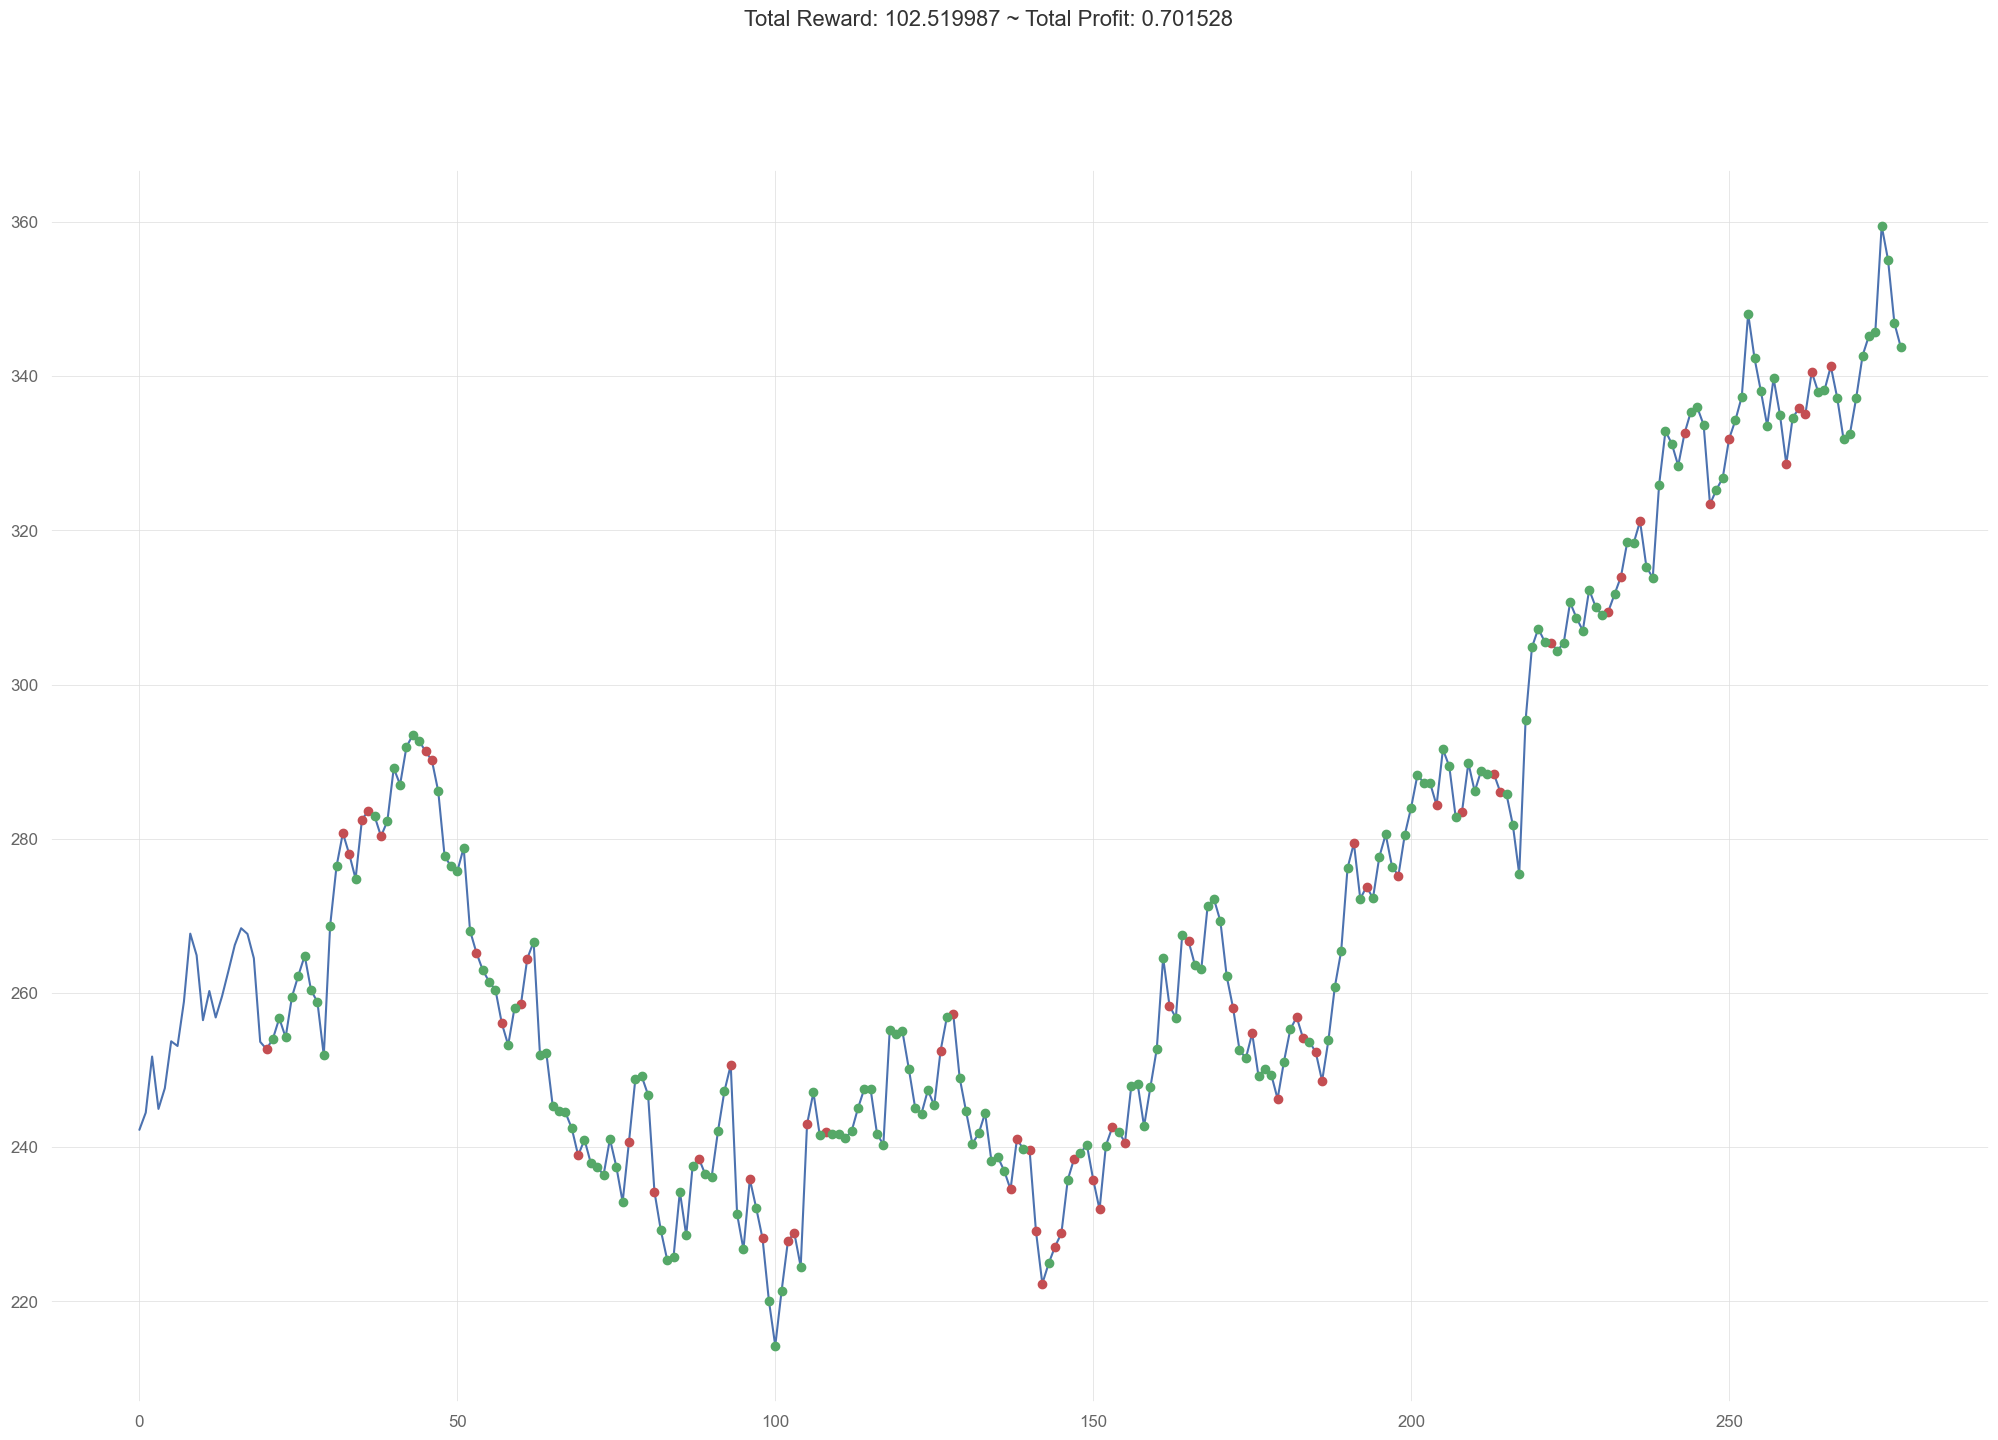

In [61]:
#Load our trained A2C model
model = A2C.load("best_model/tmp/best_model_a2c.zip")

#Create a new environment with validation data
env = MyCustomEnv(df=data, window_size=20, frame_bound=(1000,1258))
obs = env.reset()


while True: 
    obs = obs[np.newaxis, ...]
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        print("info", info)
        break


#Plot the results
plt.figure(figsize=(25,16),facecolor='w')
plt.cla()
env.render_all()
plt.xlabel('timesteps')
plt.ylabel('stockprices')
plt.show()

- The total profit of 0.70 and reward 102.50 is better than the previous A2C model without custom indicators
- But still there are some losses 

info {'total_reward': 101.00985799999998, 'total_profit': 0.8293216823863461, 'position': 1}


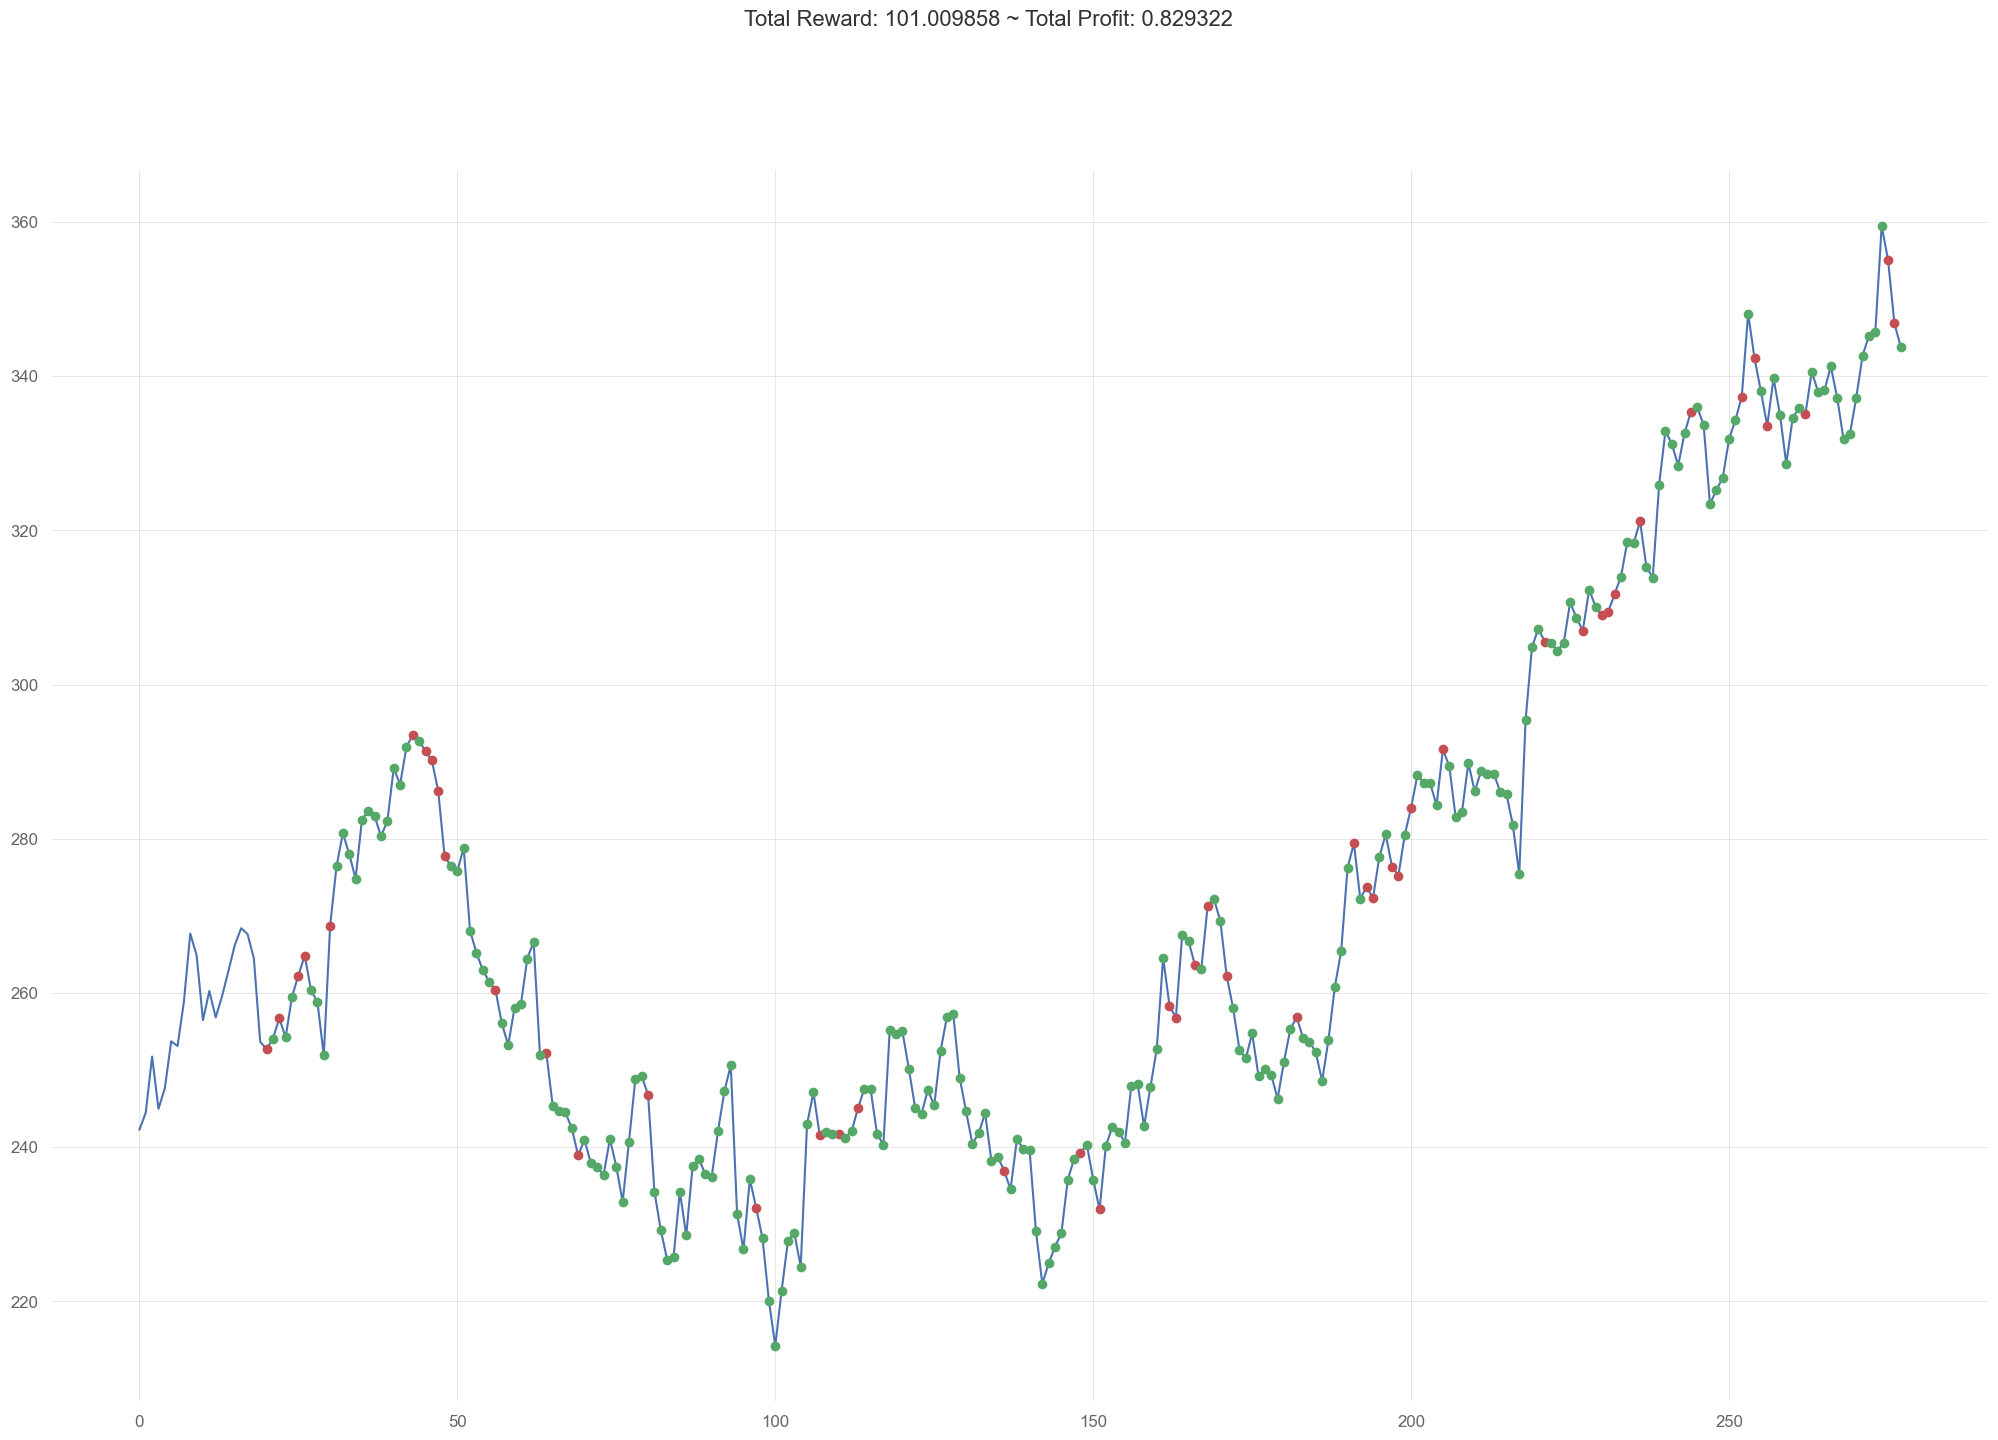

In [62]:
#Load our trained PPO model
model = PPO.load("best_model/tmp/best_model_ppo.zip")

#Create a new environment with validation data
env = MyCustomEnv(df=data, window_size=20, frame_bound=(1000,1258))
obs = env.reset()


while True: 
    obs = obs[np.newaxis, ...]
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        print("info", info)
        break


#Plot the results
plt.figure(figsize=(25,16),facecolor='w')
plt.cla()
env.render_all()
plt.xlabel('timesteps')
plt.ylabel('stockprices')
plt.show()

- This total reward of 101.00 and total profit of 0.82 is better than A2C model
- But the model still can perform better

d:\test\aigot\RL_env\Lib\site-packages\stable_baselines3\common\buffers.py:229: UserWarning: This system does not have apparently enough memory to store the complete replay buffer 2.26GB > 1.25GB
  warnings.warn(


info {'total_reward': 87.68003800000002, 'total_profit': 1.1254755978052688, 'position': 1}


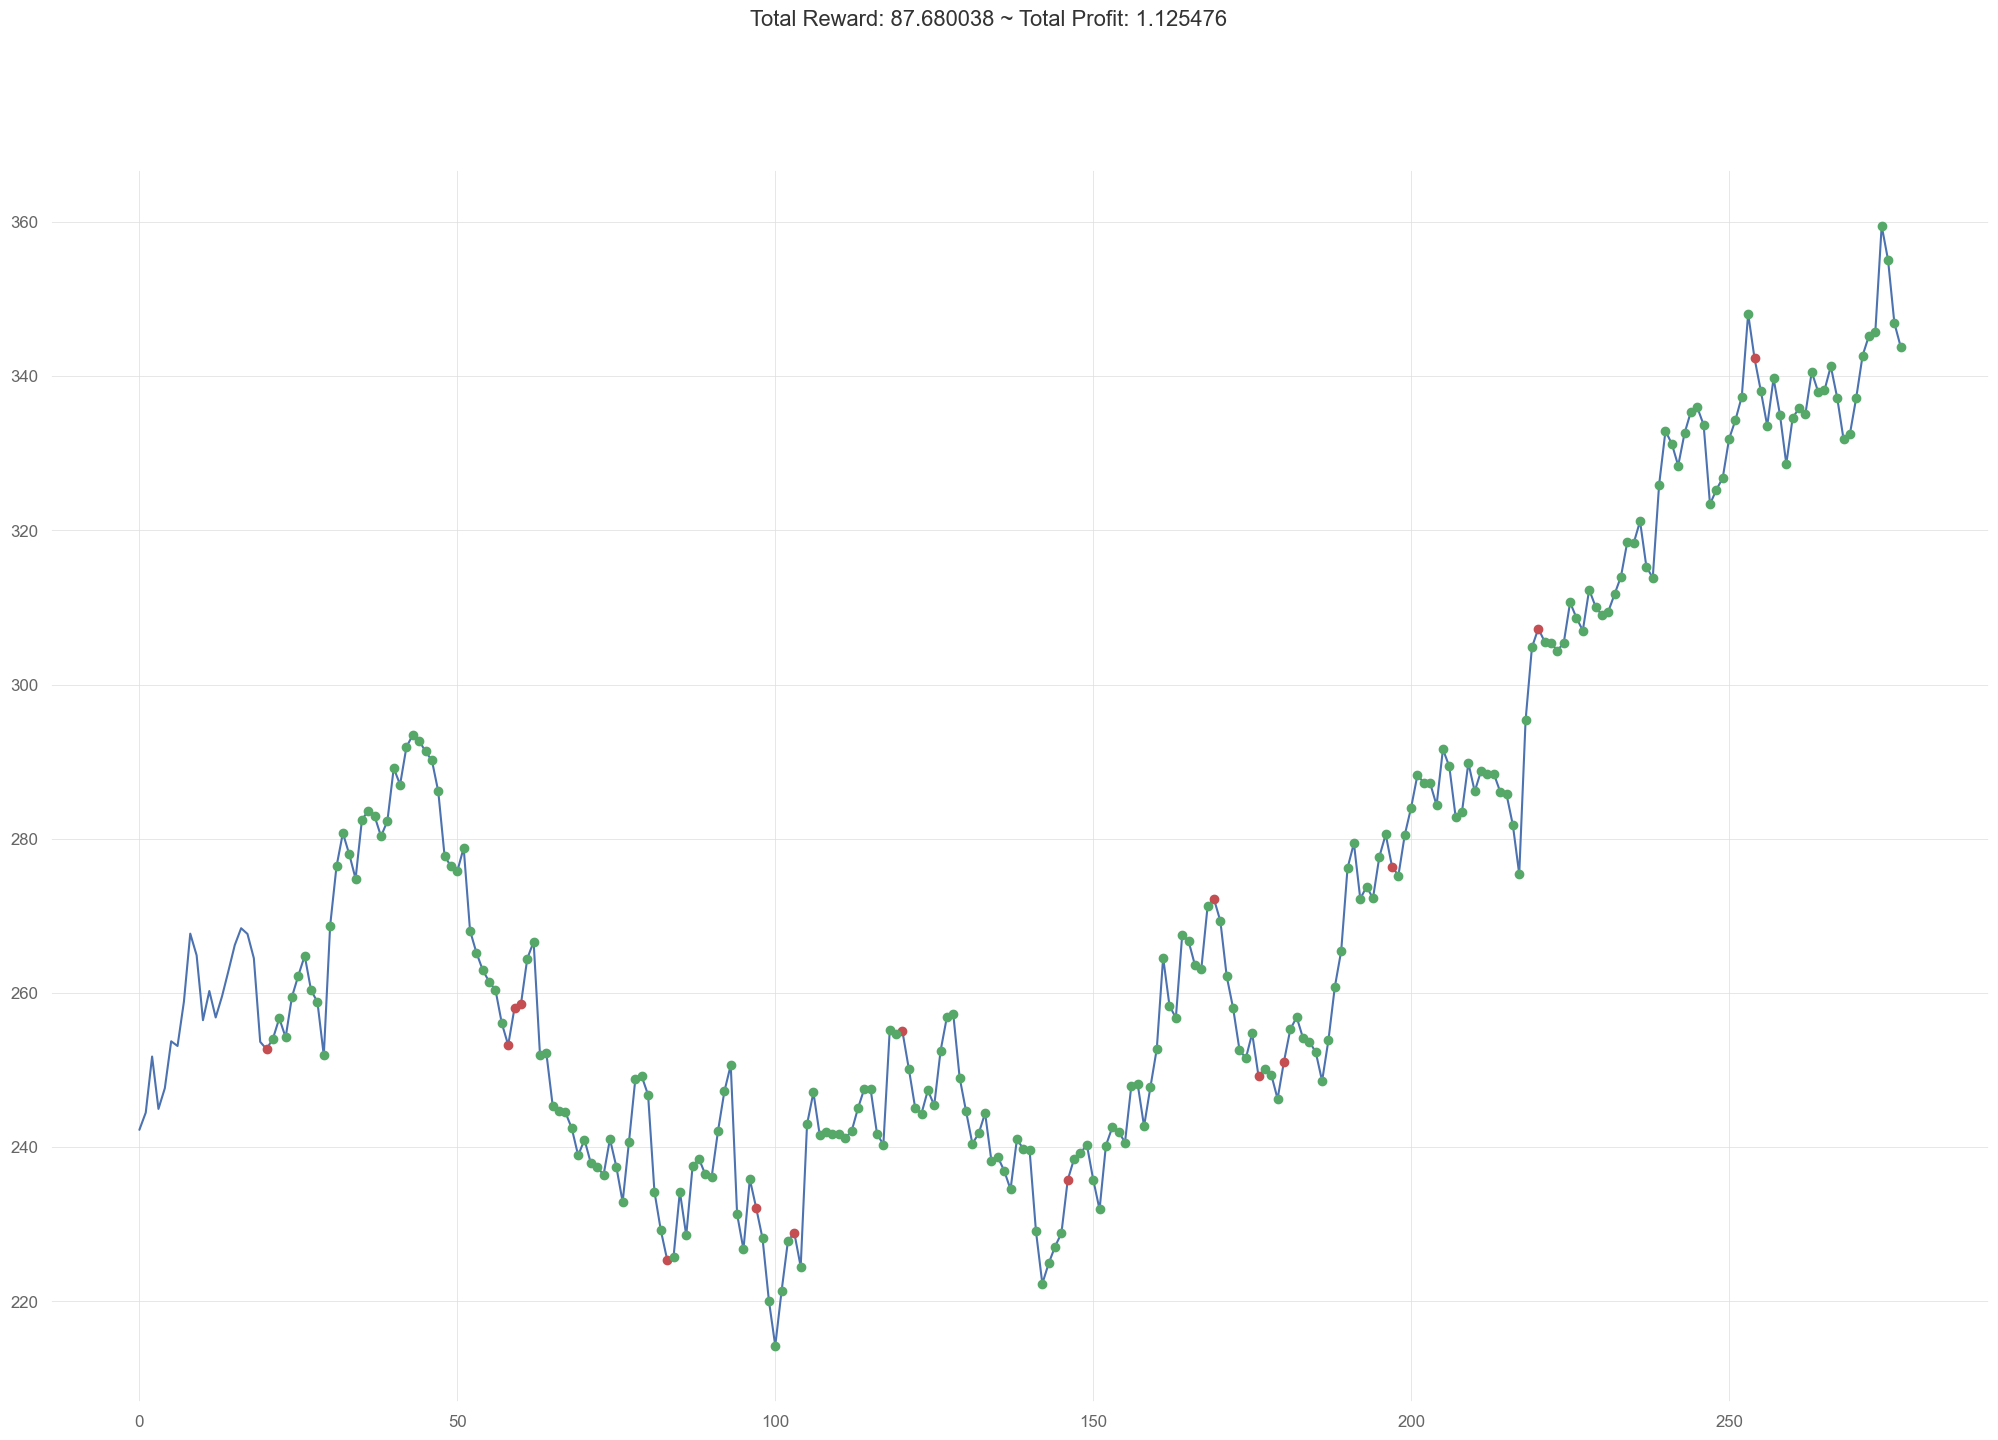

In [65]:
#Load our trained DQN model
model = DQN.load("best_model/tmp/best_model_dqn.zip")

#Create a new environment with validation data
env = MyCustomEnv(df=data, window_size=20, frame_bound=(1000,1258))
obs = env.reset()


while True: 
    obs = obs[np.newaxis, ...]
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        print("info", info)
        break


#Plot the results
plt.figure(figsize=(25,16),facecolor='w')
plt.cla()
env.render_all()
plt.xlabel('timesteps')
plt.ylabel('stockprices')
plt.show()

- The total profit of 1.12 is far better than all the models as of now 
- So, I consider this as the best model than other models

# Quant Reports

                           Strategy
-------------------------  ----------
Start Period               2022-07-15
End Period                 2023-07-21
Risk-Free Rate             0.0%
Time in Market             3.0%

Cumulative Return          19.61%
CAGR﹪                     12.93%

Sharpe                     0.77
Prob. Sharpe Ratio         79.14%
Smart Sharpe               0.77
Sortino                    1.34
Smart Sortino              1.34
Sortino/√2                 0.95
Smart Sortino/√2           0.95
Omega                      2.22

Max Drawdown               -17.57%
Longest DD Days            210
Volatility (ann.)          27.97%
Calmar                     0.74
Skew                       3.04
Kurtosis                   86.0

Expected Daily %           0.07%
Expected Monthly %         1.39%
Expected Yearly %          9.36%
Kelly Criterion            36.63%
Risk of Ruin               0.0%
Daily Value-at-Risk        -2.81%
Expected Shortfall (cVaR)  -2.81%

Max Consecutive Wins       

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2022-09-06,2022-10-11,2023-04-03,210,-17.565553,-13.049959


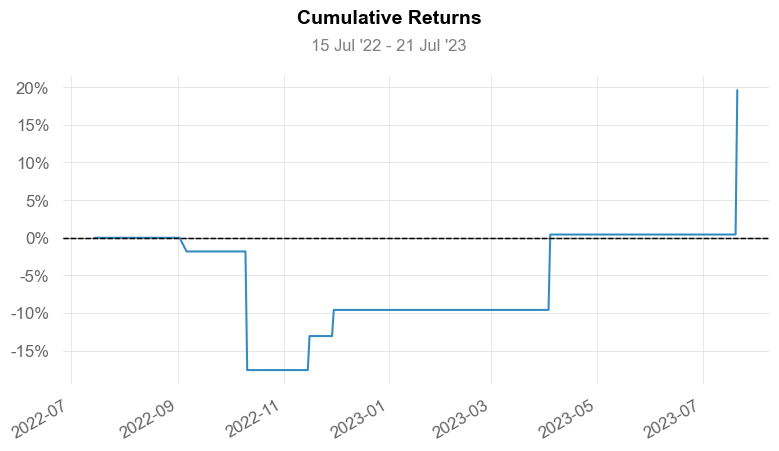

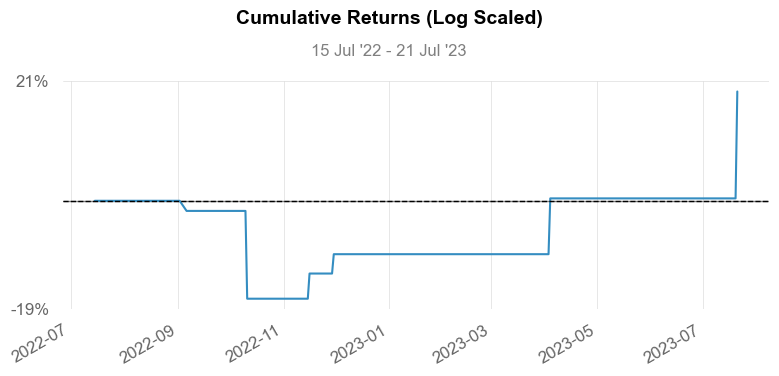

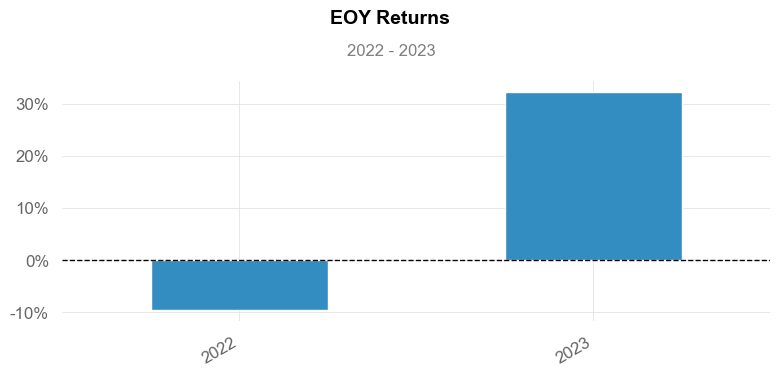

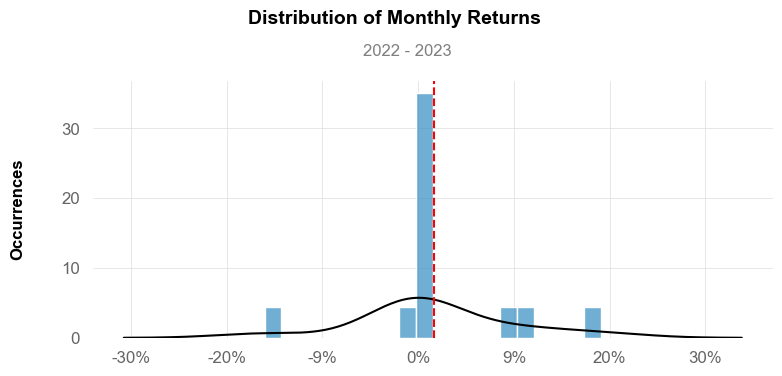

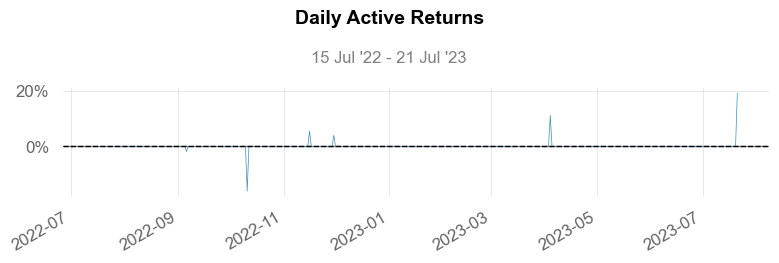

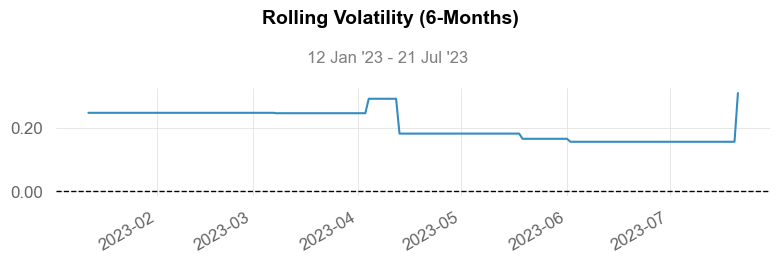

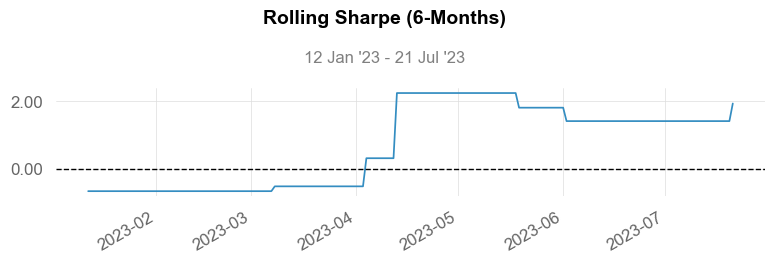

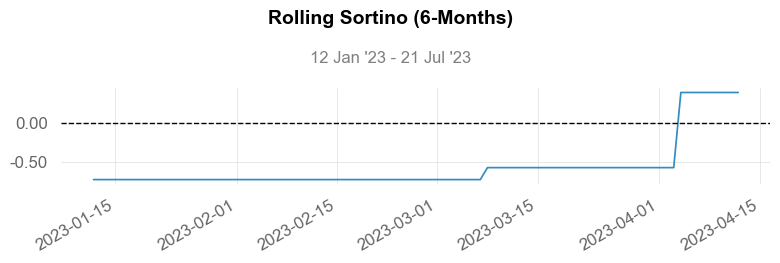

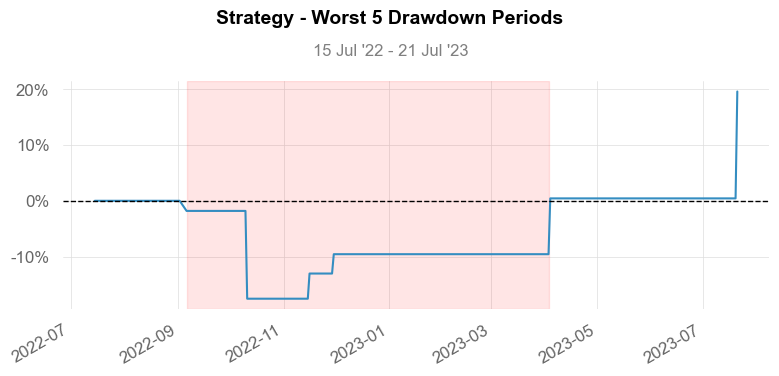

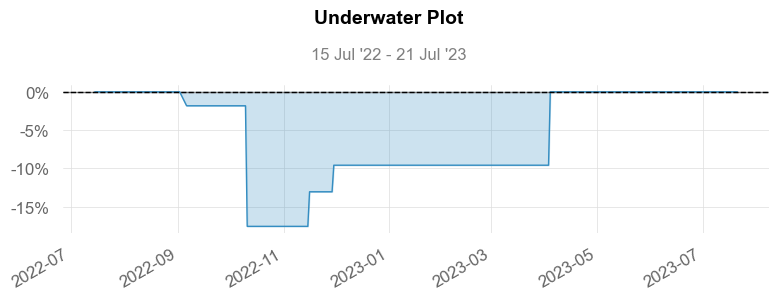

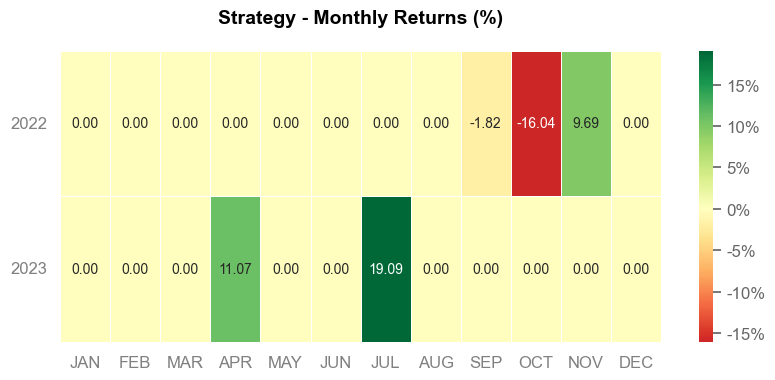

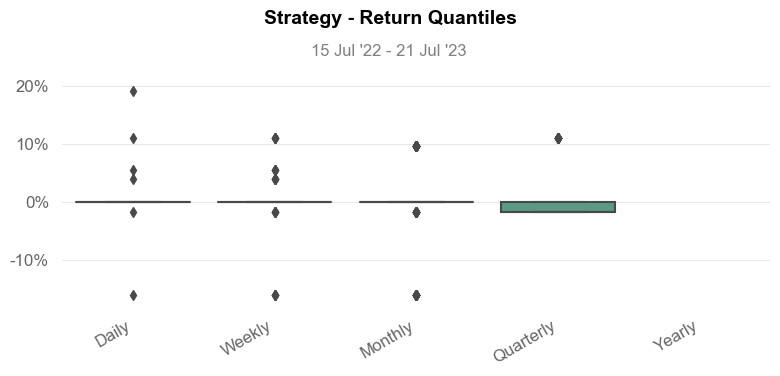

In [69]:
qs.extend_pandas()

net_worth = pd.Series(env.history['total_profit'], index=data.index[1000+1:])
returns = net_worth.pct_change().iloc[1:]

qs.reports.full(returns)